## Using Machine Learning for a classification problem

Pytorch, TensorFlow, Sklearn 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# 1. Generate Synthetic Data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [8]:
# 2. Define a Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16) #You get the right size of NN with Hyperparameter tuning 
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [10]:
# 3. Train the Model
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 4. Evaluate the Model
with torch.no_grad():
    train_preds = torch.argmax(model(X_train), axis=1)
    test_preds = torch.argmax(model(X_test), axis=1)
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [10/100], Loss: 0.4610
Epoch [20/100], Loss: 0.2872
Epoch [30/100], Loss: 0.2715
Epoch [40/100], Loss: 0.2284
Epoch [50/100], Loss: 0.1850
Epoch [60/100], Loss: 0.1401
Epoch [70/100], Loss: 0.1083
Epoch [80/100], Loss: 0.0897
Epoch [90/100], Loss: 0.0807
Epoch [100/100], Loss: 0.0758
Train Accuracy: 0.9725
Test Accuracy: 0.9750


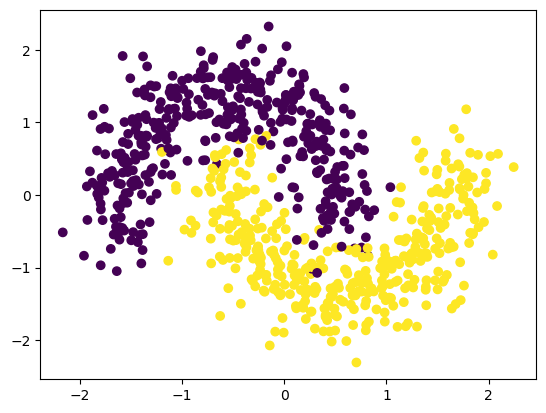

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train)
plt.show()

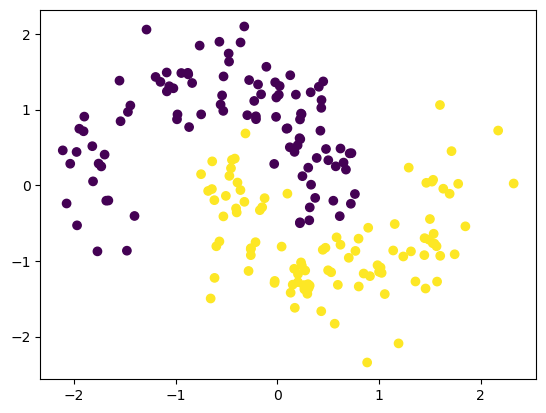

In [5]:
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test)
plt.show()

/Users/shreeyeshmenon/opt/anaconda3/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_croot-udngs7fm/pytorch_1648016055234/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


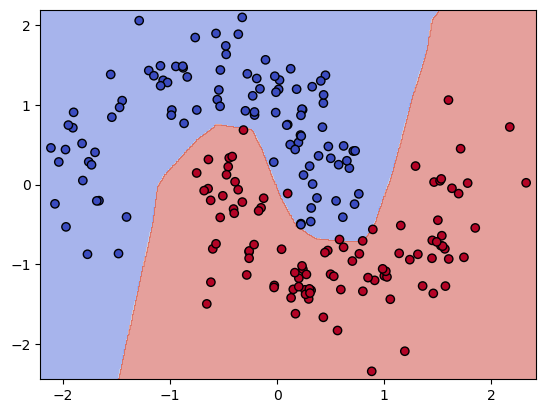

In [21]:
# 5. Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01), torch.arange(y_min, y_max, 0.01))
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    with torch.no_grad():
        Z = torch.argmax(model(grid.float()), axis=1).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.show()

plot_decision_boundary(model, X_test.numpy(), y_test.numpy())

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans

# Generate random data for clustering
np.random.seed(0)
data = np.random.rand(100, 2)

# Define range of potential clusters
k_values = range(1, 10)
inertia = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot inertia to visualize the elbow
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


NameError: name 'KMeans' is not defined

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random data for clustering
np.random.seed(0)
data = np.random.rand(100, 2)

# Define the number of clusters
num_clusters = 3

# Create a k-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and color them based on cluster
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Machine Learning for a Regression task

In [22]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for a regression problem
np.random.seed(0)
X = np.random.rand(1000, 1) * 10  # Features
y = 2.5 * X**2 + np.random.randn(1000, 1) * 2  # Target variable with some noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

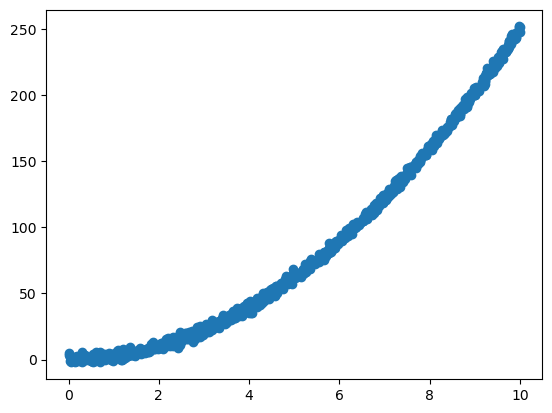

In [23]:
plt.scatter(X,y)

Epoch [10/100], Loss: 11417.1426
Epoch [20/100], Loss: 7904.6587
Epoch [30/100], Loss: 2497.5293
Epoch [40/100], Loss: 506.0692
Epoch [50/100], Loss: 157.9093
Epoch [60/100], Loss: 141.2954
Epoch [70/100], Loss: 66.5732
Epoch [80/100], Loss: 58.4404
Epoch [90/100], Loss: 34.9514
Epoch [100/100], Loss: 26.7981


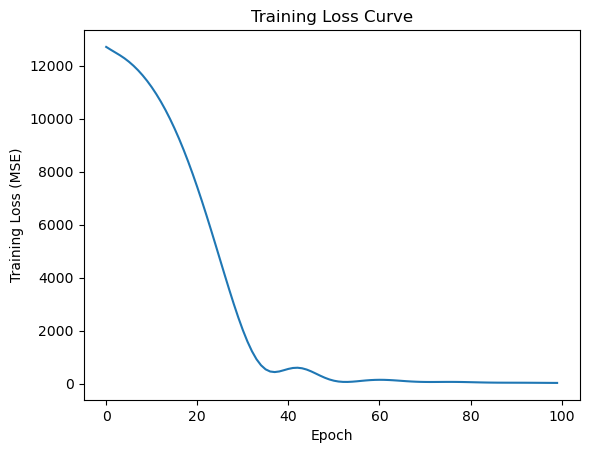

Test MSE Loss: 24.0637


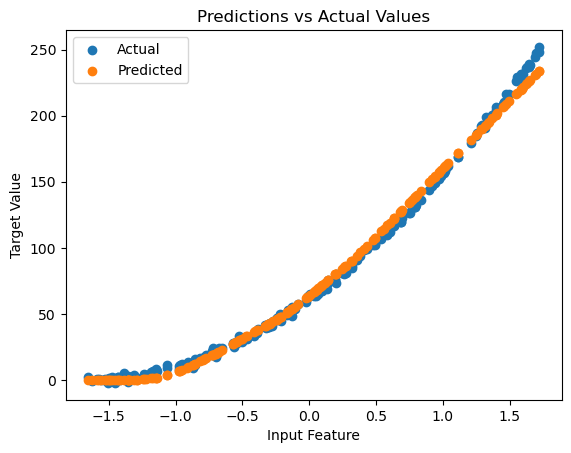

In [24]:
# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Initialize the model, define loss function and optimizer
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear previous gradients

    # Forward pass
    predictions = model(X_train)
    loss = criterion(predictions, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Store the loss for visualization
    train_losses.append(loss.item())

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Plot training loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.title('Training Loss Curve')
plt.show()

# Evaluate the model on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = mean_squared_error(y_test, test_predictions)

print(f'Test MSE Loss: {test_loss:.4f}')

# Plot predictions vs actual values
plt.scatter(X_test.numpy(), y_test.numpy(), label='Actual')
plt.scatter(X_test.numpy(), test_predictions.numpy(), label='Predicted')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.title('Predictions vs Actual Values')
plt.show()

### Different from "Linear" Regression

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

Text(0.5, 1.0, 'Predictions vs Actual Values')

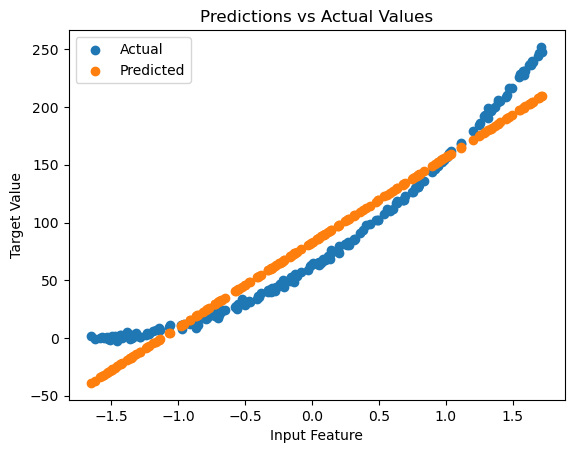

In [26]:
plt.scatter(X_test.numpy(), y_test.numpy(), label='Actual')
plt.scatter(X_test.numpy(), reg.predict(X_test), label='Predicted')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.title('Predictions vs Actual Values')